# Logistic Regression

### Load Data

In [1]:
import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data.csv", header=0)
print("rows of original dataset:", len(df))
print(df.head())

rows of original dataset: 5110
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


### handle missing values

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df["bmi"] = imputer.fit_transform(df[["bmi"]])

### Encode categorical variables

In [3]:
label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df["gender"])
df["ever_married"] = label_encoder.fit_transform(df["ever_married"])
df["work_type"] = label_encoder.fit_transform(df["work_type"])
df["Residence_type"] = label_encoder.fit_transform(df["Residence_type"])
df["smoking_status"] = label_encoder.fit_transform(df["smoking_status"])

### Split Train data and Test data

In [4]:
X = df.drop(columns=["id", "stroke"])
y = df["stroke"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standardize features

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train Logistic Regression with L1 regularization

In [7]:
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10, C=1.0)
model_l1.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=10, penalty='l1', solver='saga')

### Train Logistic Regression with L2 regularization

In [8]:
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10, C=1.0)
model_l2.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

### Evaluate the model

In [9]:
y_pred_l1 = model_l1.predict(X_test)
y_pred_l2 = model_l2.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f'Accuracy with L1 regularization: {accuracy_l1 * 100:.2f}%')
print(f'Accuracy with L2 regularization: {accuracy_l2 * 100:.2f}%')

Accuracy with L1 regularization: 94.19%
Accuracy with L2 regularization: 94.19%


In [10]:
print(classification_report(y_test, y_pred_l1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [11]:
print(classification_report(y_test, y_pred_l2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

### ROC Curve

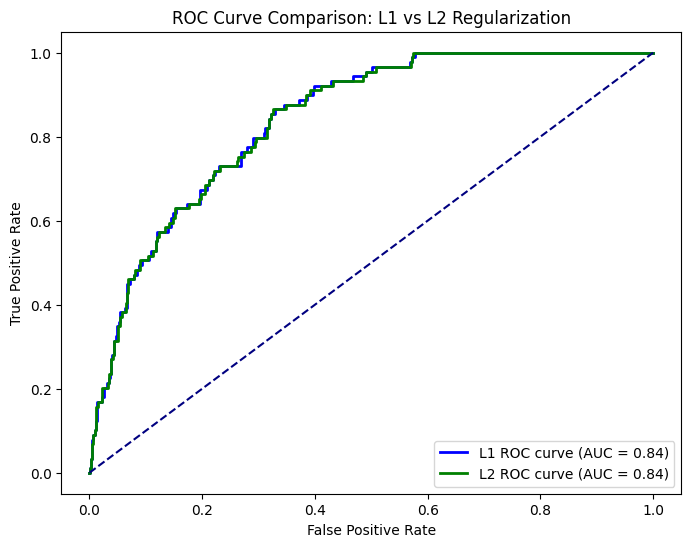

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_l1 = model_l1.predict_proba(X_test)[:, 1]
y_prob_l2 = model_l2.predict_proba(X_test)[:, 1]

fpr_l1, tpr_l1, _ = roc_curve(y_test, y_prob_l1)
roc_auc_l1 = auc(fpr_l1, tpr_l1)

fpr_l2, tpr_l2, _ = roc_curve(y_test, y_prob_l2)
roc_auc_l2 = auc(fpr_l2, tpr_l2)

plt.figure(figsize=(8, 6))
plt.plot(fpr_l1, tpr_l1, color="blue", lw=2, label=f"L1 ROC curve (AUC = {roc_auc_l1:.2f})")
plt.plot(fpr_l2, tpr_l2, color="green", lw=2, label=f"L2 ROC curve (AUC = {roc_auc_l2:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: L1 vs L2 Regularization")
plt.legend(loc="lower right")
plt.show()


### Precision-Recall Curves

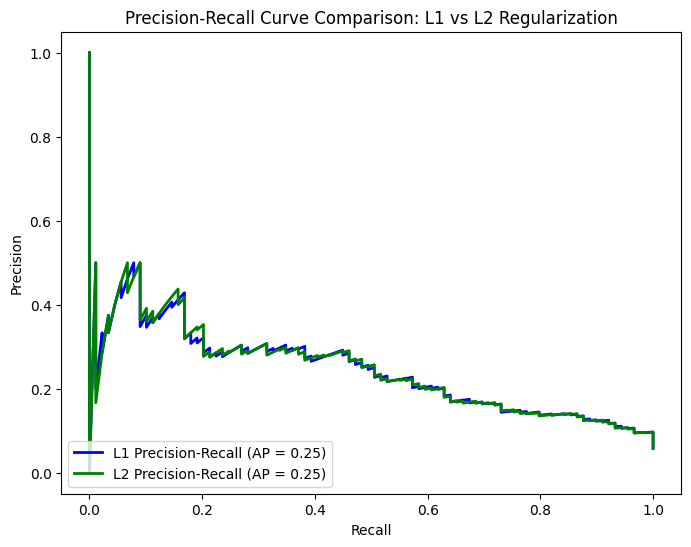

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_l1, recall_l1, _ = precision_recall_curve(y_test, y_prob_l1)
average_precision_l1 = average_precision_score(y_test, y_prob_l1)

precision_l2, recall_l2, _ = precision_recall_curve(y_test, y_prob_l2)
average_precision_l2 = average_precision_score(y_test, y_prob_l2)

plt.figure(figsize=(8, 6))
plt.plot(recall_l1, precision_l1, color="blue", lw=2, label=f"L1 Precision-Recall (AP = {average_precision_l1:.2f})")
plt.plot(recall_l2, precision_l2, color="green", lw=2, label=f"L2 Precision-Recall (AP = {average_precision_l2:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison: L1 vs L2 Regularization")
plt.legend(loc="lower left")
plt.show()


### Confusion Matrices

In [24]:
from sklearn.metrics import confusion_matrix

conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)

print("Confusion Matrix with L1 regularization:\n", conf_matrix_l1)
print("Confusion Matrix with L2 regularization:\n", conf_matrix_l2)


Confusion Matrix with L1 regularization:
 [[1444    0]
 [  89    0]]
Confusion Matrix with L2 regularization:
 [[1444    0]
 [  89    0]]
